**IMPORT LIBRARIES AND DATASETS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
 
creditcard_df = pd.read_csv(io.BytesIO(uploaded['marketing_data.csv']))
creditcard_df


Saving marketing_data.csv to marketing_data.csv


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**INSIGHTS OF DATAFRAME**

In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**CALCULATE AVERAGE,MINIMUM,MAXIMUM OF BALANCE COLUMN**

In [ ]:
creditcard_df['BALANCE'].mean()

1564.4748276781006

In [ ]:
creditcard_df['BALANCE'].min()

0.0

In [ ]:
creditcard_df['BALANCE'].max()

19043.13856

**STATISCAL SUMMARY OF DATAFRAME**

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Obtain feature of customer who has made maximum "One-off Purchases " 

In [ ]:
creditcard_df['ONEOFF_PURCHASES'].max()

40761.25

In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**VISUALISE AND EXPLORE DATASET**

For Data Visualization we are using seaborn and heatmap.

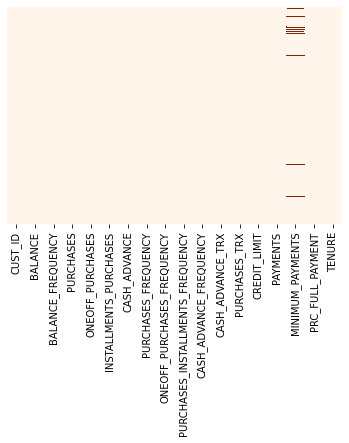

In [ ]:
sns.heatmap(creditcard_df.isnull(),yticklabels= False,cbar= False,cmap='Oranges')

Missing Samples in Datafreame

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Fill out missing elements of column  "Minimum Payments" with its average.

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),"MINIMUM_PAYMENTS"] = creditcard_df['MINIMUM_PAYMENTS'].mean()

Fill out missing element in column "Credit Limit"

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),"CREDIT_LIMIT"] = creditcard_df['CREDIT_LIMIT'].mean()

Check again if there are any missing elements in DataFrame.

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

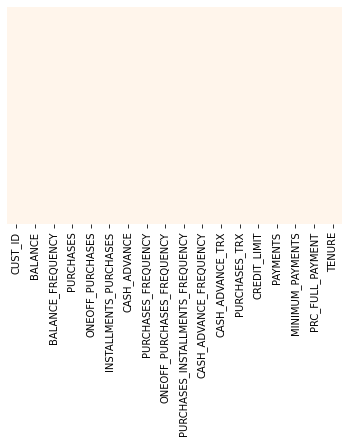

In [ ]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap='Oranges')

Check if there are any duplicate entries in data.

In [ ]:
creditcard_df.duplicated().sum()

0

Remove 'Customer ID' column because it is not useful in dataframe.

In [ ]:
creditcard_df.drop('CUST_ID',axis = 1,inplace =True)

In [ ]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Find Number of columns present in Dataframe 

In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

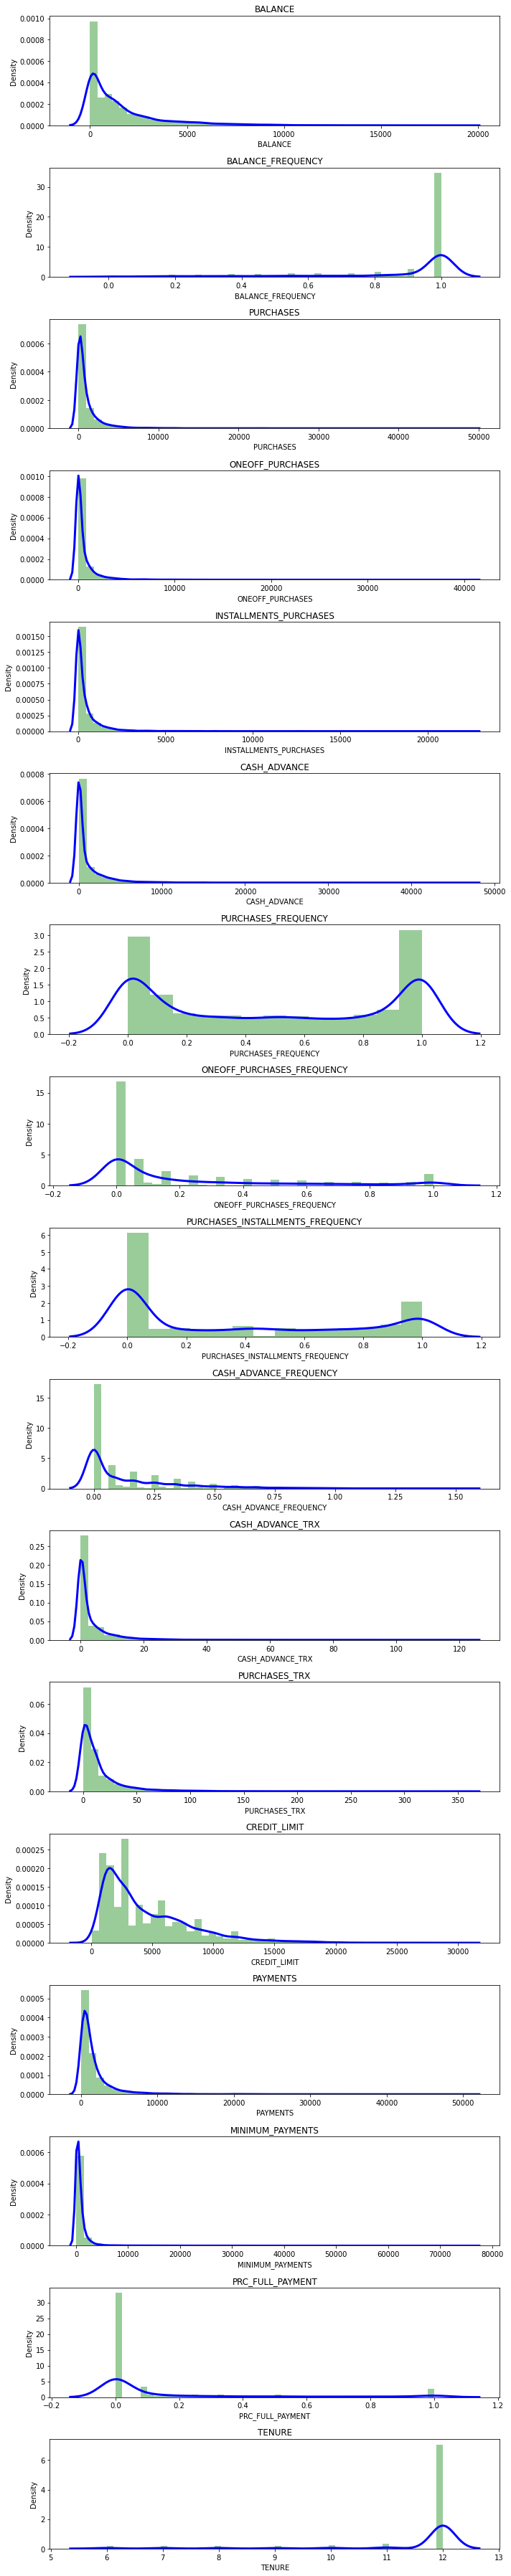

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

OBTAIN CORRELATION MATRIX BETWEEN FEATURES

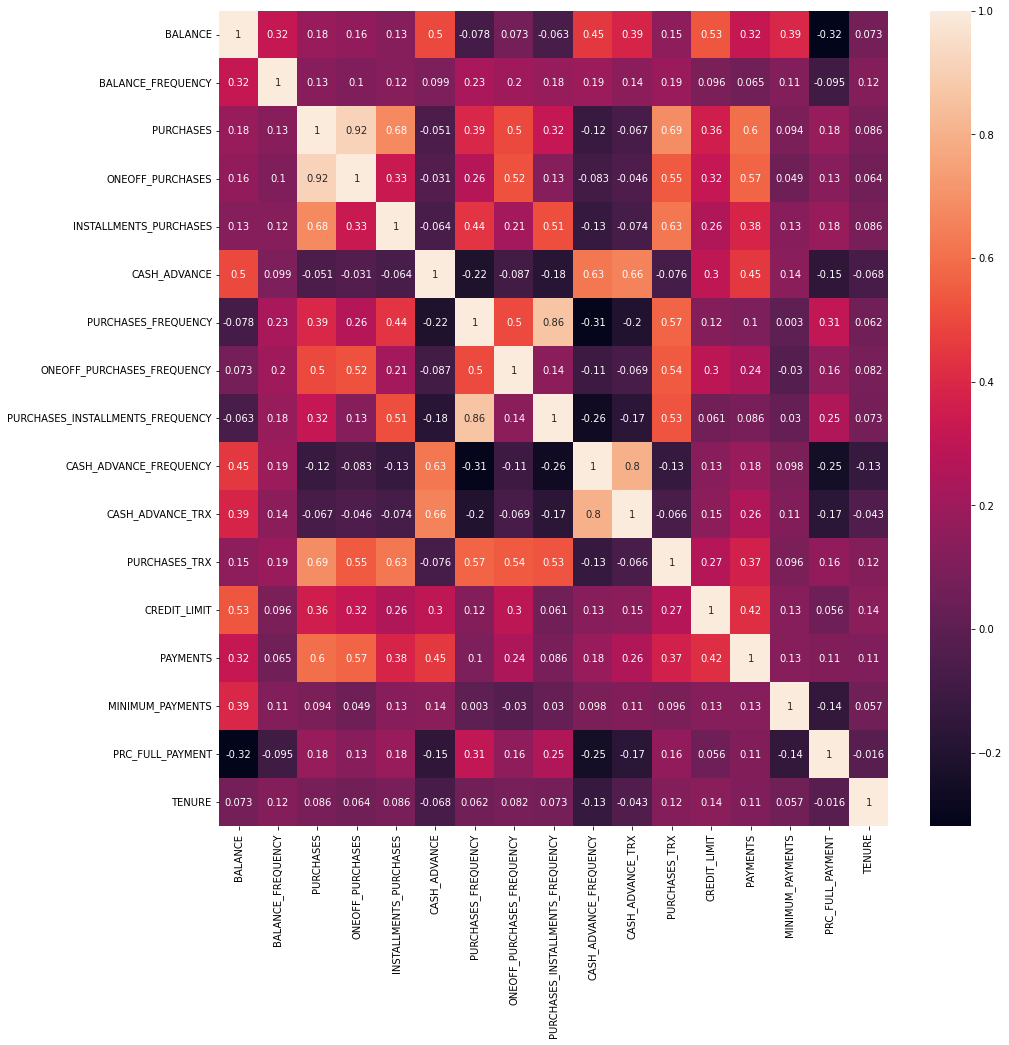

In [ ]:
corr_matrix = creditcard_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot = True)
plt.show()

**FIND OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

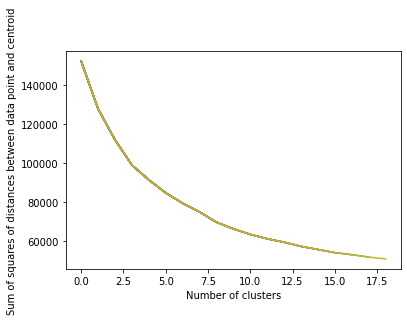

In [ ]:
scores_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    plt.plot(scores_1)
    plt.ylabel("Sum of squares of distances between data point and centroid")
    plt.xlabel("Number of clusters")


**APPLY KMEANS METHOD**

In [ ]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(7, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_ ,columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.140071,0.430223,0.967914,0.922277,0.594222,-0.309202,1.096206,1.879994,0.537223,-0.411114,-0.319664,1.217625,0.713952,0.405507,-0.031263,0.467774,0.307390
1,-0.371002,0.332210,-0.039279,-0.231645,0.332523,-0.368086,0.978845,-0.347317,1.169782,-0.477615,-0.362912,0.173830,-0.276774,-0.222634,-0.030667,0.301644,0.252894
2,0.009128,0.402066,-0.344045,-0.225071,-0.399887,-0.101430,-0.812080,-0.336082,-0.754496,0.088614,-0.038059,-0.465347,-0.299093,-0.246717,-0.015530,-0.451955,0.272429
3,-0.701882,-2.133384,-0.306746,-0.230358,-0.301974,-0.323199,-0.546483,-0.427927,-0.440794,-0.522378,-0.376899,-0.416139,-0.172939,-0.201852,-0.257584,0.297197,0.200916
4,1.678783,0.394690,-0.195629,-0.147019,-0.192560,1.993552,-0.444193,-0.184236,-0.392903,1.907899,1.924587,-0.230843,1.015447,0.839810,0.591451,-0.391636,0.068828
5,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
6,1.450349,0.406491,7.314004,6.440437,5.458856,0.041463,1.072591,1.877726,1.037771,-0.269871,-0.088521,4.893955,2.246940,5.076880,0.756670,0.817877,0.331183


In order to understand this data we need to findout inverse transform.

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1856.020432,0.979186,3071.167108,2123.227742,948.414802,330.460651,0.930311,0.763296,0.577943,0.052876,1.067353,44.975436,7092.097680,2907.046197,791.350363,0.290531,11.928685
1,792.265765,0.955968,919.283817,207.953288,711.764371,206.977100,0.883208,0.098846,0.829339,0.039569,0.772220,19.030597,3487.430890,1088.641068,792.739391,0.241940,11.855755
2,1583.474727,0.972516,268.146924,218.866260,49.454612,766.168568,0.164423,0.102198,0.064581,0.152877,2.989104,3.143058,3406.227299,1018.922429,828.015018,0.021526,11.881898
3,103.566909,0.371892,347.837146,210.090875,137.996103,301.107446,0.271021,0.074799,0.189255,0.030611,0.676768,4.366162,3865.226805,1148.803276,263.917593,0.240640,11.786195
4,5058.719485,0.970769,585.240370,348.416330,236.938148,5159.442701,0.312075,0.147497,0.208287,0.516934,16.382716,8.971942,8189.062341,4164.310653,2242.559007,0.039168,11.609428
5,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
6,4583.253694,0.973565,16629.686842,11282.243421,5347.443421,1065.820621,0.920833,0.762620,0.776874,0.081140,2.644737,136.355263,12669.736842,16430.215128,2627.594408,0.392930,11.960526


In [ ]:
labels.min()

0

In [ ]:
labels.max()

6

In [ ]:
labels.shape

(8950,)

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([6, 2, 1, ..., 3, 3, 3], dtype=int32)

Concate clusters to original dataframe (Adding new column of cluster in dataframe)

In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df , pd.DataFrame({'cluster':labels})],axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Plot Histogram of clusters

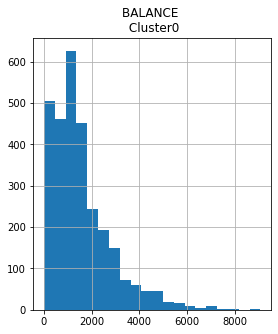

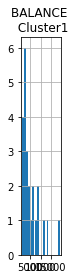

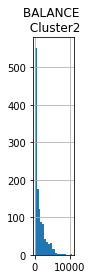

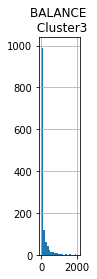

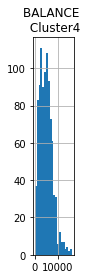

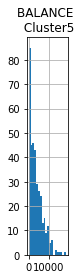

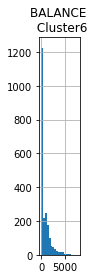

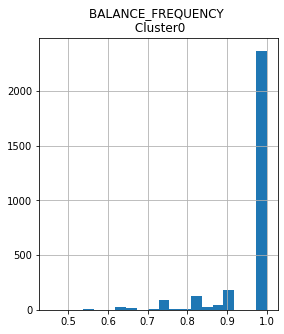

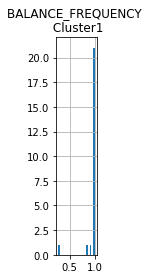

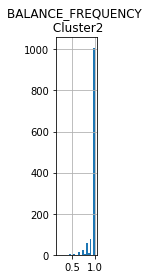

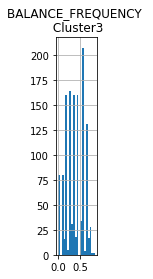

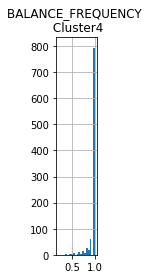

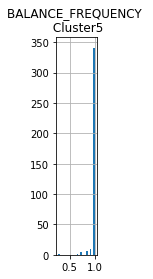

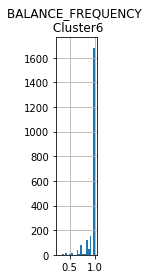

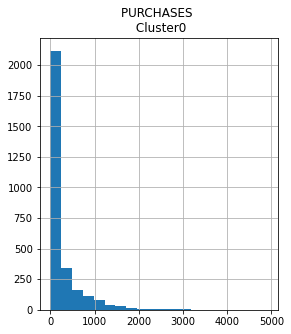

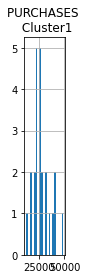

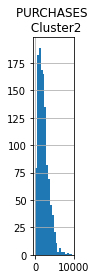

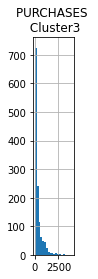

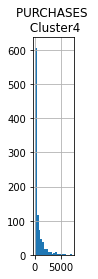

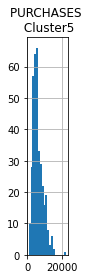

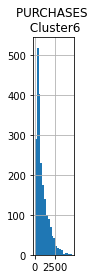

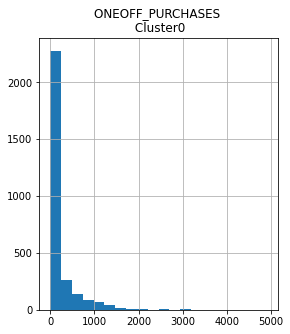

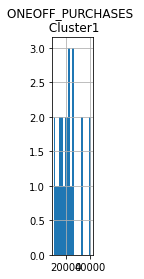

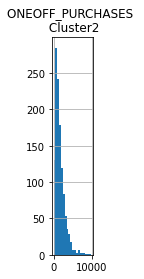

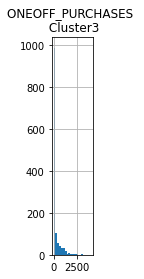

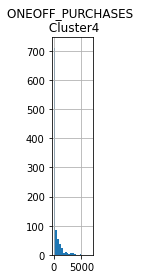

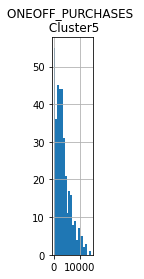

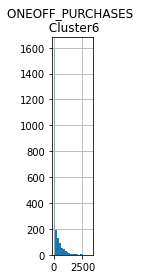

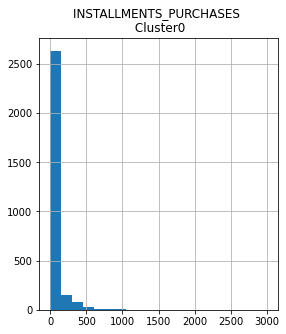

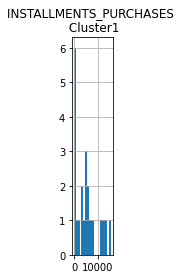

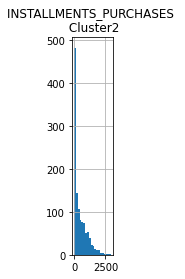

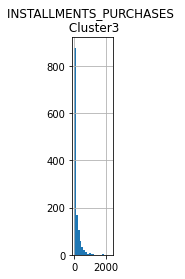

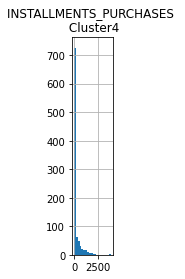

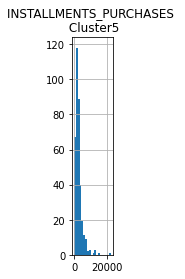

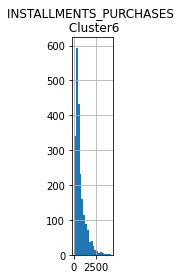

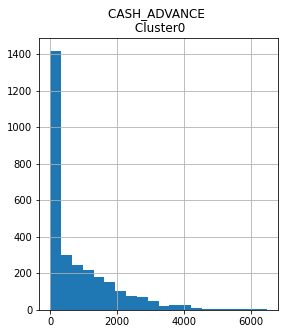

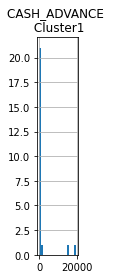

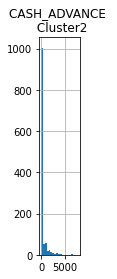

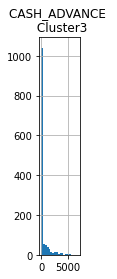

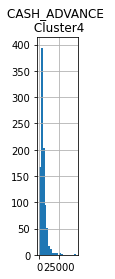

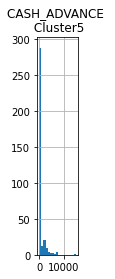

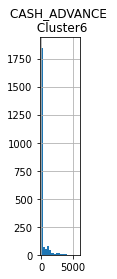

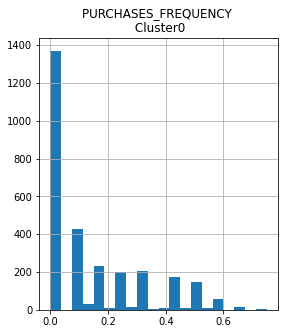

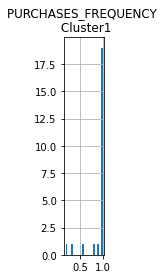

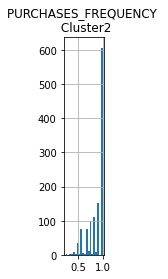

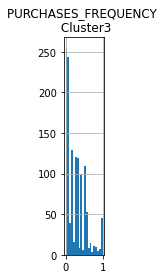

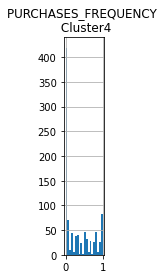

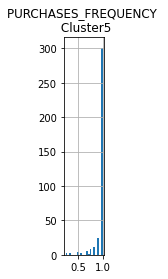

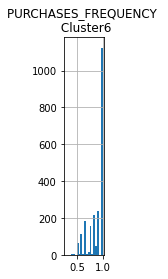

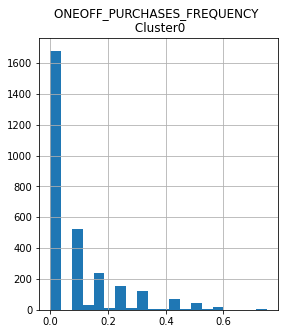

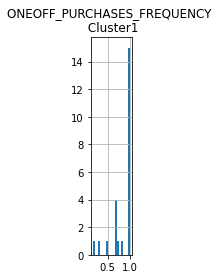

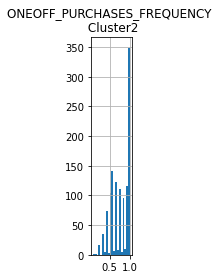

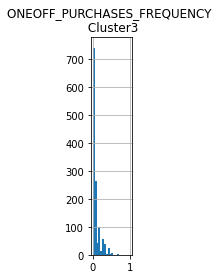

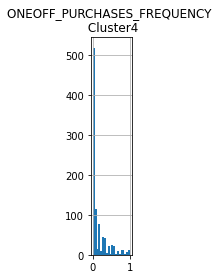

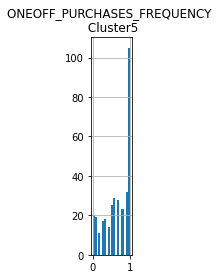

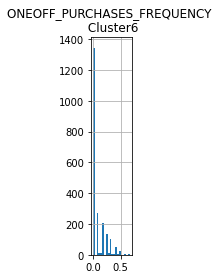

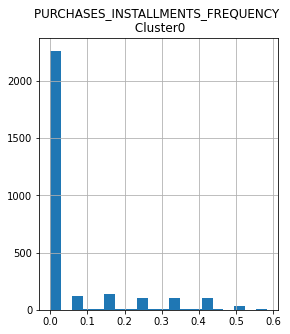

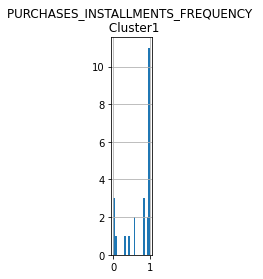

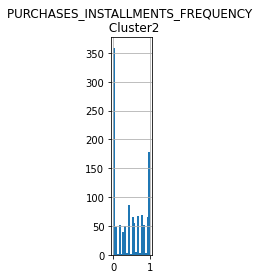

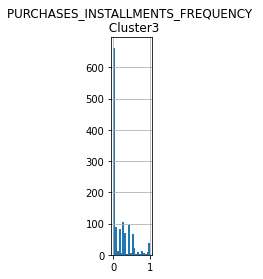

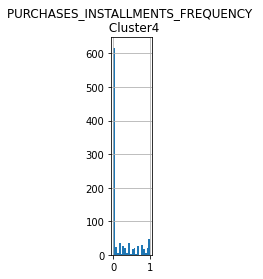

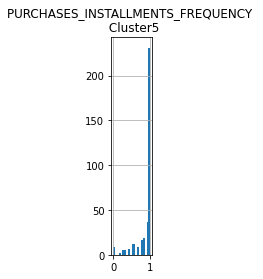

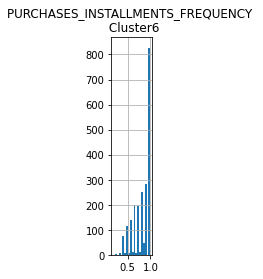

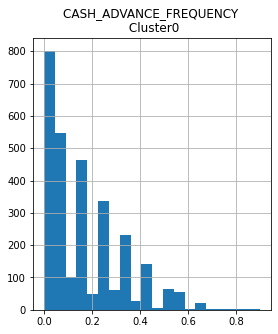

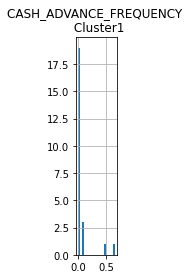

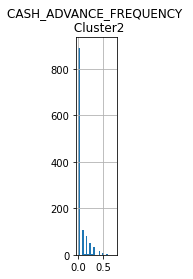

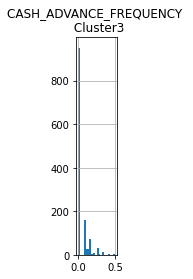

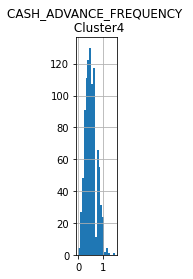

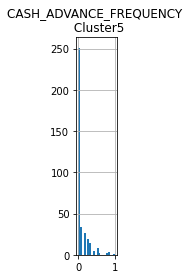

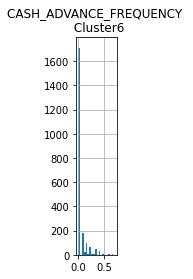

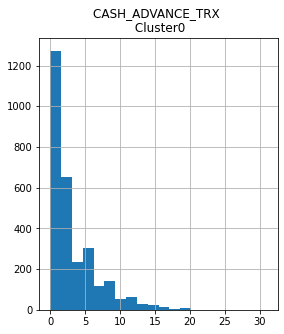

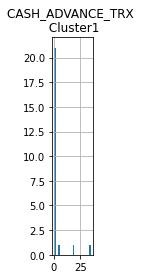

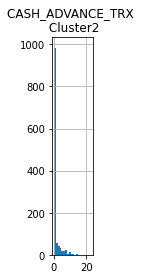

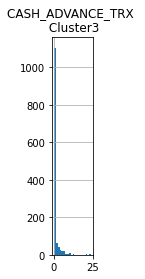

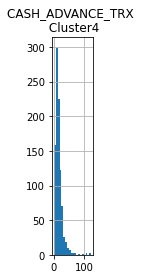

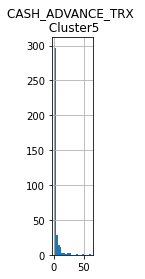

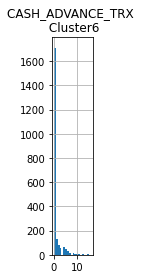

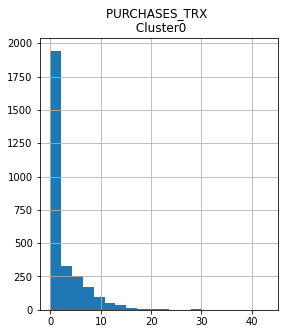

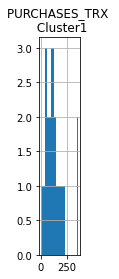

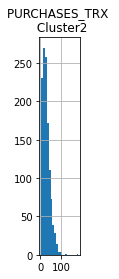

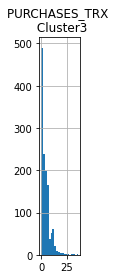

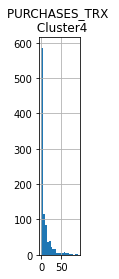

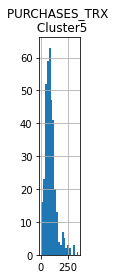

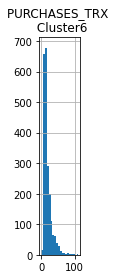

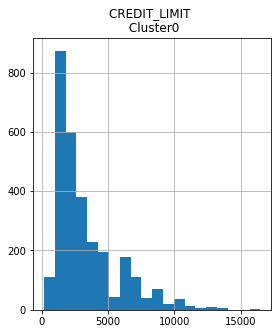

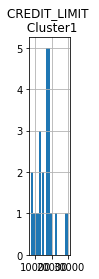

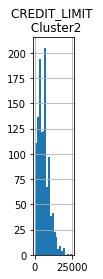

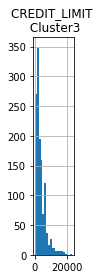

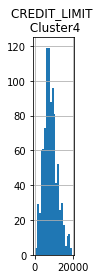

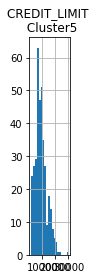

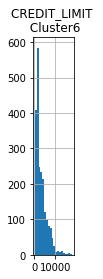

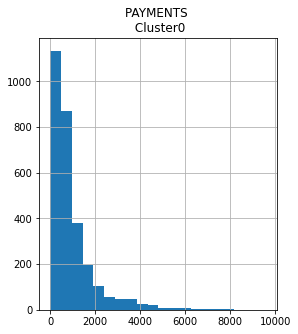

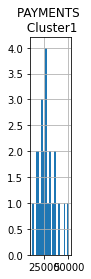

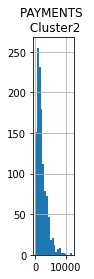

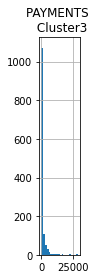

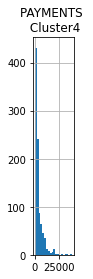

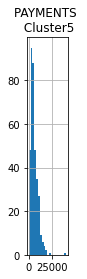

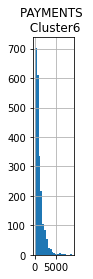

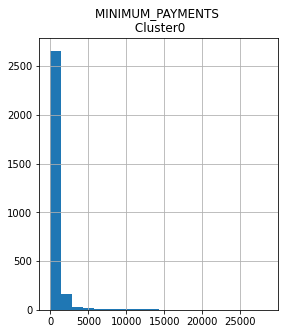

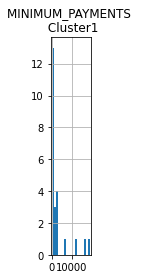

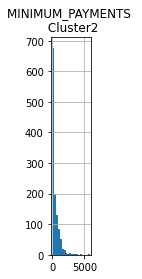

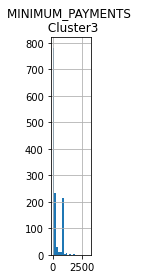

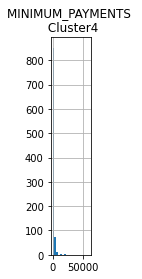

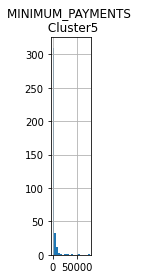

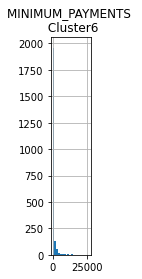

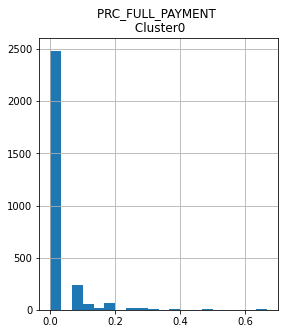

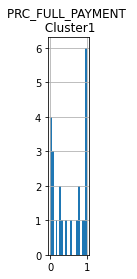

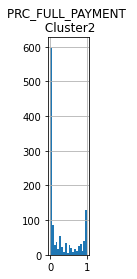

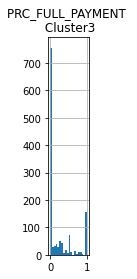

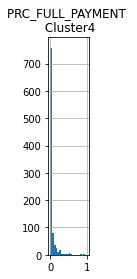

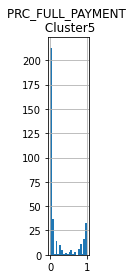

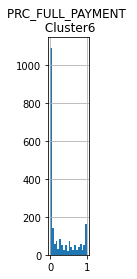

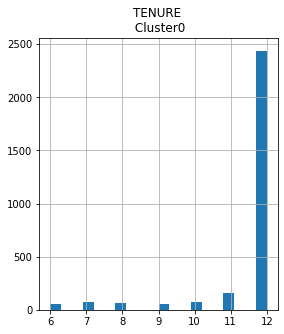

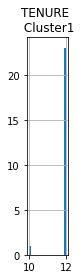

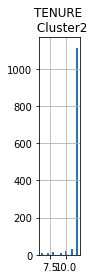

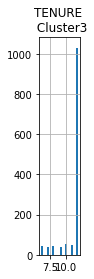

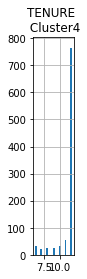

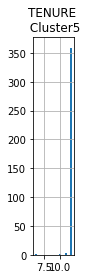

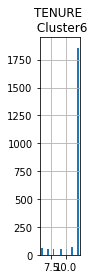

In [ ]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35,5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{} \n Cluster{}'.format(i,j))
    plt.show()

**APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALISE THE RESULTS**

In [ ]:
pca = PCA(n_components= 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222299, -1.07644327],
       [-1.13830242,  2.50651016],
       [ 0.96969537, -0.38357748],
       ...,
       [-0.92620478, -1.81078609],
       [-2.33655594, -0.65794478],
       [-0.55641617, -0.40047968]])

Create a DataFrame with two components

In [ ]:
pca_df = pd.DataFrame(data = principal_comp , columns = ['pca1','pca2'])
pca_df.head()


,pca1,pca2
0,-1.682223,-1.076443
1,-1.138302,2.506510
2,0.969695,-0.383577
3,-0.873630,0.043166
4,-1.599437,-0.688572


Concate cluster label to the dataframe

In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682223,-1.076443,0
1,-1.138302,2.506510,4
2,0.969695,-0.383577,2
3,-0.873630,0.043166,0
4,-1.599437,-0.688572,0


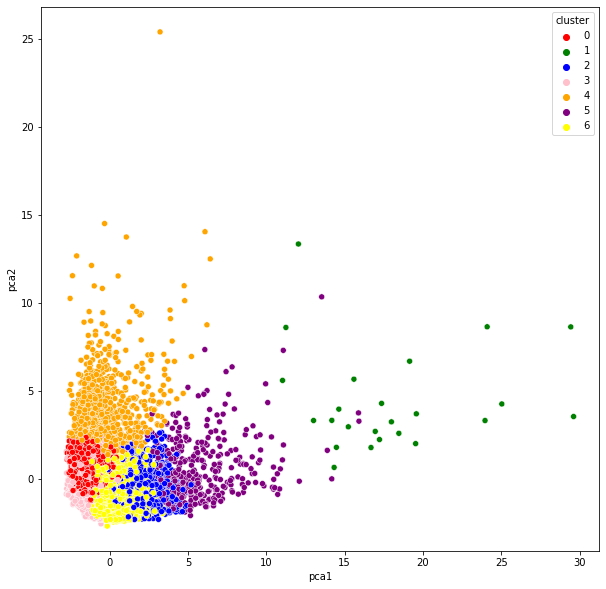

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x= 'pca1',y = 'pca2',hue ='cluster', data = pca_df , palette = ['red','green','blue','pink','orange','purple','yellow'])
plt.show()